# Bias Variance Trade-Off

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Generate synthetic data for house prices and sizes

In [2]:
np.random.seed(0)
n_samples = 100
X = np.sort(np.random.rand(n_samples)) * 10
y = 1.5 * X + np.sin(3 * X) + np.random.randn(n_samples)

In [3]:
X.shape

(100,)

Since LinearRegression model expects 2D array with shape (n_samples, n_features) we must convert it.

In [4]:
X = X.reshape(-1, 1)
X.shape

(100, 1)

### Split the data into training and test sets

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Polynomial Regression Model

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def fit_polynomial(degree):
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    
    pipeline = Pipeline([("polynomial_features", polynomial_features), 
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train, y_train)
    
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    return train_error, test_error, pipeline

### Fitting and evaluatitn polynomial regression models for different degrees

In [7]:
degrees = range(1, 21)

train_errors = []
test_errors = []
models = []

for degree in degrees:
    train_error, test_error, model = fit_polynomial(degree)
    train_errors.append(train_error)
    test_errors.append(test_error)
    models.append(model)

### Bias-Variance trade-off curve

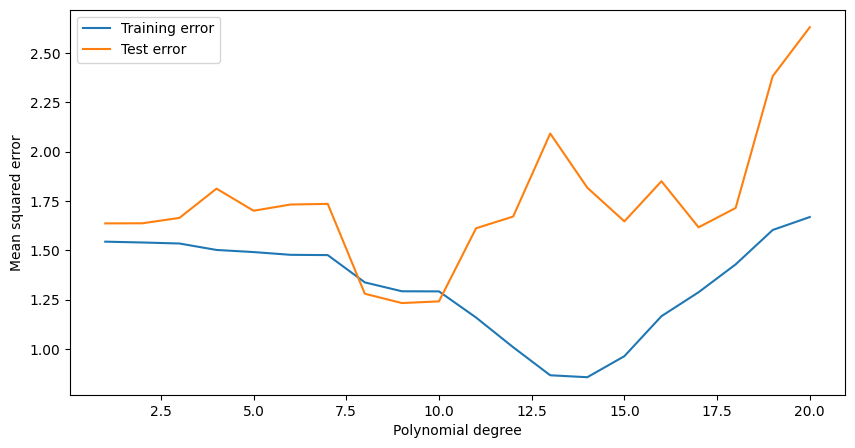

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(degrees, train_errors, label="Training error")
plt.plot(degrees, test_errors, label="Test error")
plt.xlabel("Polynomial degree")
plt.ylabel("Mean squared error")
plt.legend()

### Best Model

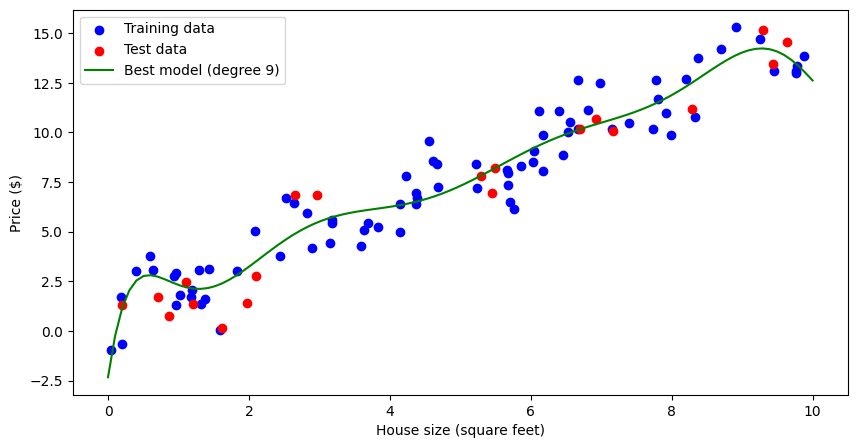

In [13]:
best_model_index = np.argmin(test_errors)
best_model = models[best_model_index]
x_plot = np.linspace(0, 10, 100)
y_plot = best_model.predict(x_plot.reshape(-1, 1))
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, color="blue", label="Training data")
plt.scatter(X_test, y_test, color="red", label="Test data")
plt.plot(x_plot, y_plot, color="green", label=f"Best model (degree {best_model_index + 1})")
plt.xlabel("House size (square feet)")
plt.ylabel("Price ($)")
plt.legend()
plt.show()